## Assignment 5

In [3]:
import numpy as np
import seaborn as sns

import matplotlib.pylab as plt

from sklearn.neighbors.kde import KernelDensity
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV

%matplotlib inline 

In [14]:
sns.set_style('whitegrid')

### Exercise 1

* Load the data on fragments of glass collected in forensic work from glass.txt.
* Estimate the density of the first variable (refractive in-dex) using a histogram and use a kernel density estimator (you can use histograms from numpy and kernel density estimators from sklearn). Use cross-validation to choose the amount of smoothing.
* Experiment with different binwidths and bandwidths.
* Plot the obtained densities.

In [5]:
# ========================= Your code here =========================

data = np.loadtxt('glass.txt', skiprows=1, usecols=[i for i in range(1, 10)])
refl_idx = data[:, 0]

In [22]:
def plot_hist_dens (data, bins):
    plt.figure()
    sns.distplot(data,
                 bins=bins, kde_kws={"color": "g", "lw": 1.8, "label": "KDE"},
                   hist_kws={"linewidth": 1.3,
                             "alpha": .41, "label": "Histogram"})

TypeError: slice indices must be integers or None or have an __index__ method

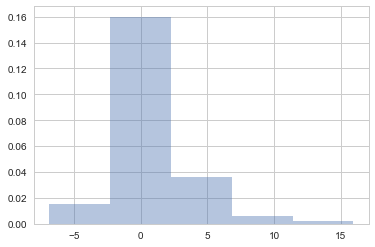

In [23]:
for bins in np.arange(5, 55, 10):
    plot_hist_dens(refl_idx, bins)

In [24]:
def best_kde(kernel):
    params = {'bandwidth': np.linspace(0.1, 10, 40)}
    grid = GridSearchCV(KernelDensity(kernel=kernel), params)
    grid.fit(data.reshape((-1, 1)))
    print
    return grid.best_estimator_

In [26]:
best_kde('tophat')

//anaconda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:593: RuntimeWarning: invalid value encountered in subtract
  array_means[:, np.newaxis]) ** 2,


KernelDensity(algorithm='auto', atol=0, bandwidth=1.3692307692307693,
       breadth_first=True, kernel='tophat', leaf_size=40,
       metric='euclidean', metric_params=None, rtol=0)

### Exercise 2

* Let $Y$ be refractive index and let $x$ be aluminum content (the fourth variable).
* Perform a nonparametric regression to fit the model $Y=f(x)+ \epsilon$. Use cross-validation to estimatethe bandwidth.
* Visualize your model and training data.

In [7]:
# ========================= Your code here =========================
Y = data[:, 0]
x = data[:, 3]

We will try to use in this problem both parametric and non-parametric approaches and compare them with each other. 

### Simple Linear regression

In [11]:
reg = linear_model.LinearRegression()
reg.fit(x.reshape(-1, 1), Y.reshape(-1, 1))
print "Coefs are: ", reg.coef_[0], reg.intercept_

Coefs are:  [-2.47760639] [ 3.94533024]


In [9]:
print "R^2 of linear regression: ", reg.score(x.reshape(-1, 1), Y.reshape(-1, 1))

R^2 of linear regression:  0.16591449804


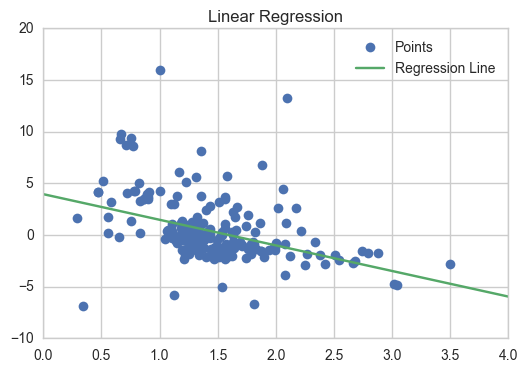

In [14]:
x_ = np.linspace(0, 4, 50)
#sns.jointplot(x, Y)
plt.plot(x, Y, 'o', label = "Points")
plt.plot(x_, (reg.intercept_ + reg.coef_ * x_)[0], label = "Regression Line")
plt.legend(loc='best')
plt.title("Linear Regression")

The performance is very poor, which is pretty obvious, because it is the simplest possible model.

### Non-parametric regression. Nadaraya-Watson estimator

We perform Nadaraya-Watson estimator with two kernels: Gaussian, Epanechnikov.

In [ ]:
def kernel_estimator (x, y, kernel = 'gaussian'):
    

### Exercise 3

* Load clustering.txt dataset
* Load the ground truth cluster labels from clustering_labels.txt
* Try KMeans, Gaussian Mixture and 2 more clustering algorithms from sklearn. Try small number of clusters, right number of clusters and large number of clusters. Visualize the results and calculate 2 clustering metrics: silhouette score and adjusted mutual information.
* Using boostrap calculate confidence intervals for clustering metrics:
  * generate bootstrap samples
  * for each sample make clustering and calculate metrics
  * Estimate variance of metrics
  * Construct normal 95% confidence interval.
* Make conclusion.

In [ ]:
# ========================= Your code here =========================